In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df=pd.read_csv("sales_data.csv",encoding="latin1")

In [8]:
print(df.columns)
shape=df.shape

print("Shape=",shape)

print("Data Type=",df.dtypes)


print("Missing Values=",df.isnull().sum())

Index(['Product', 'Region', 'Sales', 'Profit', 'Discount', 'Category', 'Date'], dtype='object')
Shape= (250, 7)
Data Type= Product      object
Region       object
Sales         int64
Profit        int64
Discount    float64
Category     object
Date         object
dtype: object
Missing Values= Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [9]:
df=df.drop_duplicates()


print(df)

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)   
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after filling:", df.isnull().sum())

     Product Region  Sales  Profit  Discount         Category        Date
0     Tablet  North   2857    1933      0.28      Accessories  2022-10-15
1     Laptop   East   1619    1634      0.07      Accessories  2022-02-23
2     Laptop  North   4678     858      0.17  Office Supplies  2022-03-21
3     Camera   West   5817     302      0.30      Accessories  2022-04-03
4     Camera  South   5955    1903      0.24      Accessories  2022-06-16
..       ...    ...    ...     ...       ...              ...         ...
245  Printer   East   1616    1435      0.28      Electronics  2022-04-09
246   Camera   East   4170     367      0.21      Electronics  2022-01-17
247    Phone  South   2623    1372      0.08      Electronics  2022-06-02
248  Monitor  North   5774     902      0.09      Accessories  2022-11-08
249   Tablet  South   2187     567      0.15      Accessories  2022-05-25

[250 rows x 7 columns]
Missing values after filling: Product     0
Region      0
Sales       0
Profit      0
Di

C:\Users\HP\AppData\Local\Temp\ipykernel_11972\1200163417.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11972\1200163417.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

0   2022-10-15
1   2022-02-23
2   2022-03-21
3   2022-04-03
4   2022-06-16
Name: Date, dtype: datetime64[ns]


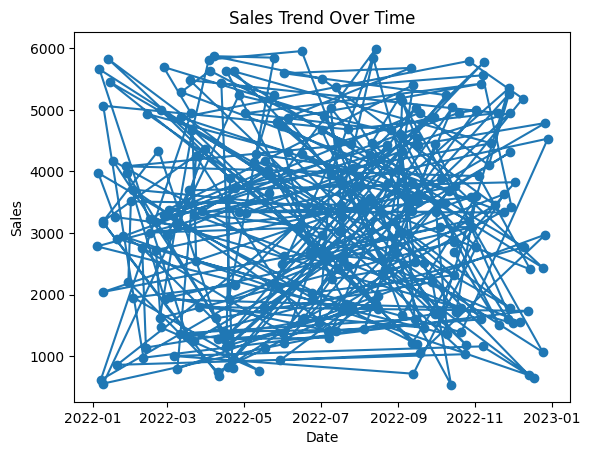

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df['Date'].head())

plt.plot(df['Date'], df['Sales'], marker='o')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")


plt.show()

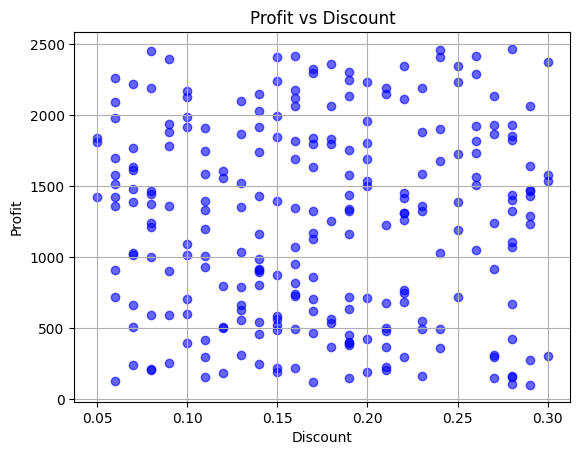

In [11]:
plt.scatter(df['Discount'], df['Profit'], alpha=0.6, c='blue')
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

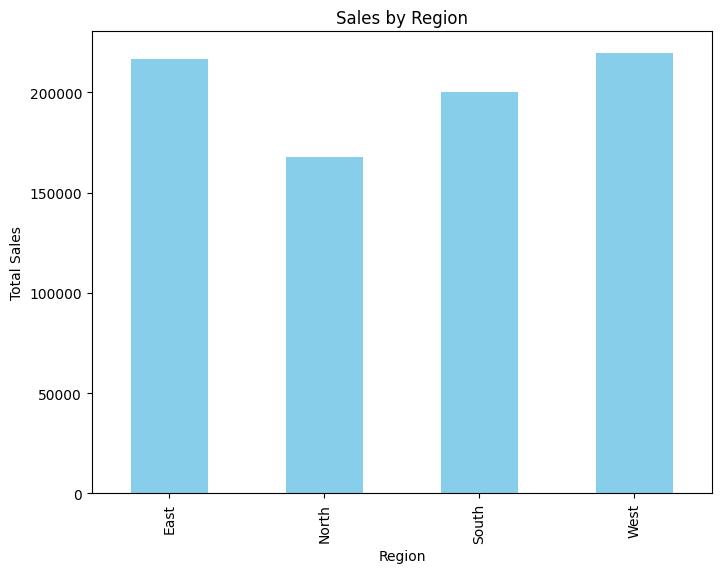

In [12]:
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', figsize=(8,6), color='skyblue')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.show()

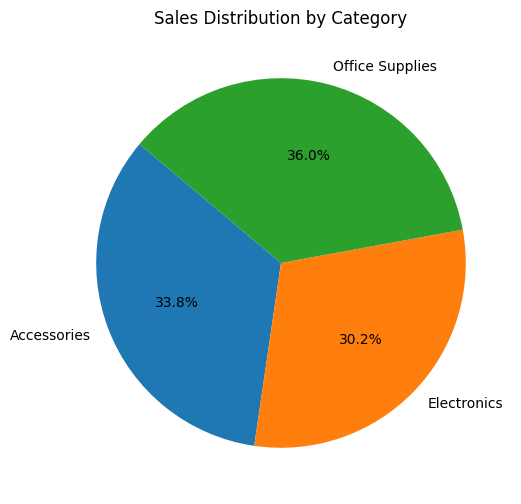

In [13]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=140)
plt.title("Sales Distribution by Category")
plt.ylabel("")  
plt.show()

In [14]:
X = df[['Profit', 'Discount']]
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression Model Trained")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

✅ Linear Regression Model Trained
Coefficients: [-2.01502592e-03  1.75927091e+02]
Intercept: 3191.047009587457
Mean Squared Error (MSE): 2460603.28349231
R² Score: 0.0031110898495604333


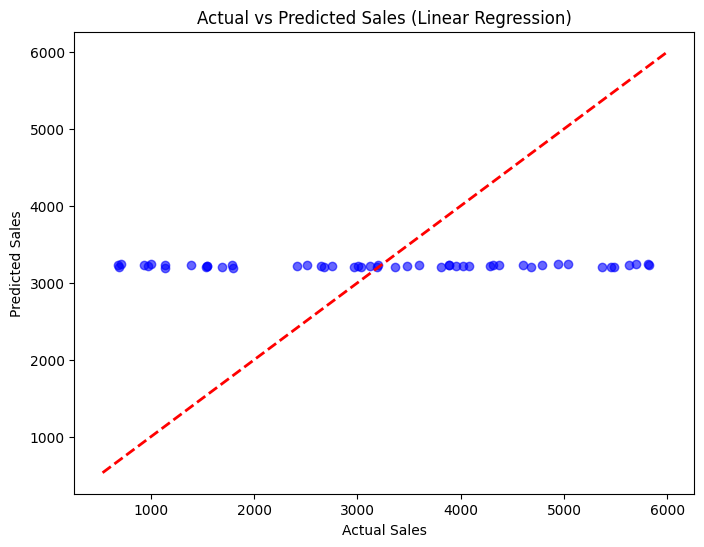

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.show()